In [102]:
# value_counts -> (Data Frame & series) => Frequency count of each unique item in series. => Frequency count of every row in a dataset if applied on Data frame .  
# sort_values ->(Data Frame & series) => sorts the series or datasets.
# rank -->(series) => Assigning a rank on the basis of a column.
# sort index-->(series and dataframe) =>To sort on the basis of  index.
# set index-->(dataframe) => If we want  to make some column as index.
# rename index --> (dataframe) => used to rename the column or index names in a dataframe().
# reset index -->(series and dataframe) => If u have earlier made some column as index , so to again get the index back we use this function. It is also used to convert series into dataframe if applied on series.
# unique --> (Series) =>It gives us a list of all the unique values present in that series column.
# nunique --> (Series) => It is used to count number of all the unique  values present in that series column . ## NOTE :- nunique() DOES NOT COUNT NaN VALUES BUT unique() COUNTS AND SHOWS THEM TOO.
# isnull --> (series and dataframe) =>  It goes to each row if it is NaN then it returns  TRUE.
# notnull --> (series and dataframe) => It is exact opposite of isnull => it returns TRUE if it is not NaN .
# hasnans --> (series) => It simply tells whether the whole column has missin value or not ? .
# dropna --> (series and Dataframe) => Dataframe : if any row will have any missing value then it will remove the whole row .
# fillna --> (Series and Dataframe) => It is used to fill the missing values.
# duplicated() --> (Series and Dataframe) => It is used to check whether a dataframe has duplicates or not.
# drop_duplicates --> (Series and Dataframe) => used to drop the duplicate values.
# drop --> (Series and Dataframe) => To drop rows or columns.
# apply --> (Series and Dataframe) => If we want to apply some logic over row by row , we can make a function(or directly) , we  an apply.
# isin
# corr
# nlargest -> nsmallest
# insert
# copy

In [2]:
import numpy as np 
import pandas as pd 

### Value_counts

In [3]:
# value_counts(series)
a = pd.Series([1,1,1,2,2,3])
a.value_counts()

1    3
2    2
3    1
Name: count, dtype: int64

In [4]:
# value_counts(dataframe)
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])

marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [5]:
marks.value_counts()

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [6]:
ipl = pd.read_csv("ipl-matches.csv")

###  find which player has won most potm -> in finals and qualifiers

In [7]:
ipl.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


In [8]:
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

### Toss decision plot

In [9]:
ipl.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


In [10]:
ipl['TossDecision'].unique()

array(['bat', 'field'], dtype=object)

<Axes: ylabel='count'>

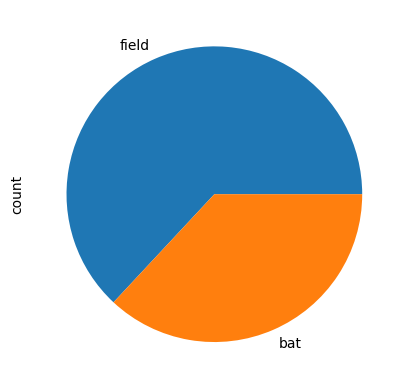

In [11]:
ipl['TossDecision'].value_counts().plot(kind='pie')

### how many matches each team has played

In [12]:
#using sort_values()
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending = False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

### sort_values()

In [13]:
x = pd.Series([12,14,1,56,89])
x

0    12
1    14
2     1
3    56
4    89
dtype: int64

In [14]:
x.sort_values(ascending=False)

4    89
3    56
1    14
0    12
2     1
dtype: int64

In [15]:
movies = pd.read_csv('movies.csv')

In [16]:
movies.head(3)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)


In [17]:
movies['title_x'].sort_values()

1498          16 December (film)
1021                 1920 (film)
287                 1920: London
723       1920: The Evil Returns
1039            1971 (2007 film)
                  ...           
778     Zindagi Na Milegi Dobara
670            Zindagi Tere Naam
756                     Zokkomon
939        Zor Lagaa Ke...Haiya!
1623                    Zubeidaa
Name: title_x, Length: 1629, dtype: object

In [18]:
# Sorting on the basis of some columns
movies.sort_values('title_x')

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


### Sort_values() with Nan

In [19]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [20]:
students.sort_values('name',na_position='first',ascending=False,inplace=True)

In [21]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [22]:
students.sort_values('name') #--> nan values are automatically sent to the bottom

,name,college,branch,cgpa,package
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [23]:
students.sort_values('name' , na_position='first')#--> nan values are automatically sent to the top

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0


### Sorting on the basis of multiple columns

In [24]:
movies.sort_values(['year_of_release' , 'title_x'])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1575,Aalavandhan,tt0294264,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aalavandhan,Aalavandhan,Aalavandhan,0,2001,177,Action|Thriller,7.1,1746,The story follows Abhay (Haasan) who has a dis...,A psychopath tries to protect his twin brother...,The Fearless,Kamal Haasan|Raveena Tandon|Manisha Koirala|Ki...,1 win & 1 nomination,16 November 2001 (India)
1576,Aamdani Atthanni Kharcha Rupaiya,tt0305173,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aamdani_Atthanni...,Aamdani Atthanni Kharcha Rupaiya,Aamdani Atthanni Kharcha Rupaiya,0,2001,150,Comedy|Drama|Family,4.7,1026,Jhoomri and her husband Bhimsha move into a ...,In order to make ends meet three women steps ...,NaN,Govinda|Juhi Chawla|Tabu|Chandrachur Singh|Joh...,1 nomination,21 December 2001 (India)
1577,Aashiq (2001 film),tt0273406,https://upload.wikimedia.org/wikipedia/en/c/c6...,https://en.wikipedia.org/wiki/Aashiq_(2001_film),Aashiq,Aashiq,0,2001,160,Action|Drama|Romance,3.8,357,Pooja and Chander Kapoor have a heart-to-heart...,Pooja and Chander Kapoor have a heart-to-heart...,NaN,Bobby Deol|Karisma Kapoor|,NaN,26 January 2001 (India)
1579,Ajnabee (2001 film),tt0278291,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ajnabee_(2001_film),Ajnabee,Ajnabee,0,2001,165,Action|Crime|Drama,6.3,7480,A new couple get married and move to Switzerla...,Bobby Deol and Kareena Kapoor play a new coupl...,Trust no one,Akshay Kumar|Bobby Deol|Kareena Kapoor|Bipasha...,3 wins & 9 nominations,21 September 2001 (India)
1578,Aks (2001 film),tt0289845,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aks_(2001_film),Aks,Aks,0,2001,184,Action|Crime|Horror,5.9,1518,Aks is the story of a hunter and his prey. A c...,Raghavan Ghatge a psychotic terrorist and Ma...,There is a stranger in your mirror,Amitabh Bachchan|Raveena Tandon|Manoj Bajpayee...,9 wins & 14 nominations,13 July 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Ujda Chaman,tt11046300,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ujda_Chaman,Ujda Chaman,Ujda Chaman,0,2019,120,Comedy,8.1,1440,Ujda Chaman is about a 30 -year-old bachelor C...,Ujda Chaman is about a 30 -year-old bachelor C...,NaN,Sunny Singh Nijjar|Maanvi Gagroo|Saurabh Shukl...,NaN,1 November 2019 (USA)
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
60,Yaaram (2019 film),tt11007050,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaaram_(2019_film),#Yaaram,#Yaaram,0,2019,\N,Comedy|Romance,5.7,7,All set for an arranged marriage Rohit Bajaj ...,All set for an arranged marriage Rohit Bajaj ...,NaN,Siddhanth Kapoor|Prateik|Anita Raj|Ishita Raj|...,NaN,NaN


In [25]:
movies.sort_values(['year_of_release' , 'title_x'] , ascending=[True , False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


## Rank


In [26]:
runs = pd.read_csv('batsman_runs_ipl.csv')

In [27]:
runs.head(3)

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4


In [28]:
runs['batting_rank']=runs['batsman_run'].rank(ascending = False)

In [29]:
runs.head(3)

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0


In [30]:
runs.sort_values('batting_rank' , inplace=True)

In [31]:
runs.head(10)

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
27,AB de Villiers,5181,6.0
108,CH Gayle,4997,7.0
339,MS Dhoni,4978,8.0
452,RV Uthappa,4954,9.0
256,KD Karthik,4377,10.0


## set_index( ) , reset_index()

In [32]:
runs.set_index('batter' , inplace = True)
runs

,batsman_run,batting_rank
batter,,
V Kohli,6634,1.0
S Dhawan,6244,2.0
DA Warner,5883,3.0
RG Sharma,5881,4.0
SK Raina,5536,5.0
...,...,...
SS Cottrell,0,594.0
S Kaushik,0,594.0
IC Pandey,0,594.0


In [33]:
runs.reset_index(inplace = True)

In [34]:
runs.head(3)

,batter,batsman_run,batting_rank
0,V Kohli,6634,1.0
1,S Dhawan,6244,2.0
2,DA Warner,5883,3.0


In [35]:
runs

,batter,batsman_run,batting_rank
0,V Kohli,6634,1.0
1,S Dhawan,6244,2.0
2,DA Warner,5883,3.0
3,RG Sharma,5881,4.0
4,SK Raina,5536,5.0
...,...,...,...
600,SS Cottrell,0,594.0
601,S Kaushik,0,594.0
602,IC Pandey,0,594.0
603,S Ladda,0,594.0


In [36]:
runs_series=runs[['batter' , 'batting_rank']]

In [37]:
runs_series.set_index('batting_rank', inplace=True)

In [38]:
runs_series=runs_series.squeeze()

In [39]:
runs_series

batting_rank
1.0           V Kohli
2.0          S Dhawan
3.0         DA Warner
4.0         RG Sharma
5.0          SK Raina
             ...     
594.0     SS Cottrell
594.0       S Kaushik
594.0       IC Pandey
594.0         S Ladda
594.0    S Lamichhane
Name: batter, Length: 605, dtype: object

In [40]:
type(runs_series)

pandas.core.series.Series

In [41]:
# Series get converted to dataframe if set_index is used on series.
runs_series.reset_index()

,batting_rank,batter
0,1.0,V Kohli
1,2.0,S Dhawan
2,3.0,DA Warner
3,4.0,RG Sharma
4,5.0,SK Raina
...,...,...
600,594.0,SS Cottrell
601,594.0,S Kaushik
602,594.0,IC Pandey
603,594.0,S Ladda


In [42]:
runs_series.reset_index()

,batting_rank,batter
0,1.0,V Kohli
1,2.0,S Dhawan
2,3.0,DA Warner
3,4.0,RG Sharma
4,5.0,SK Raina
...,...,...
600,594.0,SS Cottrell
601,594.0,S Kaushik
602,594.0,IC Pandey
603,594.0,S Ladda


## Rename

In [43]:
movies.rename(columns={'imdb_id' : "imdb" , 'poster_path' : 'link'}).head(1)

,title_x,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


In [44]:
##Rename is also use for changing the name of the index name of some row.
runs_series=runs_series.reset_index()

In [45]:
runs_series.set_index('batter' , inplace=True)

In [46]:
runs_series

,batting_rank
batter,
V Kohli,1.0
S Dhawan,2.0
DA Warner,3.0
RG Sharma,4.0
SK Raina,5.0
...,...
SS Cottrell,594.0
S Kaushik,594.0
IC Pandey,594.0


In [47]:
runs_series.rename(index={'V Kohli' :'Virat Kohli',
                          'RG Sharma' : 'Rohit Sharma'
                         },
                  inplace=True
                  )

In [48]:
runs_series.head(5)

,batting_rank
batter,
Virat Kohli,1.0
S Dhawan,2.0
DA Warner,3.0
Rohit Sharma,4.0
SK Raina,5.0


## unique() 

In [49]:
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [50]:
ipl['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

In [51]:
ipl['City'].unique().shape ## or len(ipl['City'].unique())

(34,)

## nunique() 

In [52]:
ipl['City'].nunique() ## NOTE :- nunique() DOES NOT COUNT NaN VALUES BUT unique() COUNTS AND SHOWS THEM TOO.

33

### isna() / notnull() / hasnans

In [53]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [54]:
students['name'].isnull()

3     True
5     True
7     True
9     True
2    False
6    False
0    False
4    False
1    False
8    False
Name: name, dtype: bool

In [55]:
students[students['name'].isnull()]

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.0,7.0
7,NaN,NaN,cse,10.0,9.0
9,NaN,git,NaN,NaN,NaN


In [56]:
students['name'].notnull()

3    False
5    False
7    False
9    False
2     True
6     True
0     True
4     True
1     True
8     True
Name: name, dtype: bool

In [57]:
students[students['name'].notnull()]

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [58]:
students['name'].hasnans

True

In [59]:
## isna() and notnull() both can be used on Dataframe too.

In [60]:
students.isna()

,name,college,branch,cgpa,package
3,True,True,True,True,True
5,True,False,False,False,False
7,True,True,False,False,False
9,True,False,True,True,True
2,False,False,False,False,False
6,False,False,False,False,False
0,False,False,False,False,False
4,False,True,False,False,False
1,False,False,False,False,False
8,False,True,False,False,True


In [61]:
students.notnull()

,name,college,branch,cgpa,package
3,False,False,False,False,False
5,False,True,True,True,True
7,False,False,True,True,True
9,False,True,False,False,False
2,True,True,True,True,True
6,True,True,True,True,True
0,True,True,True,True,True
4,True,False,True,True,True
1,True,True,True,True,True
8,True,False,True,True,False


### dropna

In [62]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [63]:
# when dropna is used it drops any row having even a single NaN value.

In [65]:
students.dropna()

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0


In [66]:
#If we want to drop only the rows having all the columns as NaN value.

students.dropna(how='all')

,name,college,branch,cgpa,package
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [67]:
#If we want to drop a colmn n the basis of a particular column.

students.dropna(subset='name')

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [68]:
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0


### fillna

In [70]:
students['name'].fillna('unknown') #replaces all the NaN values with unknown.

3       unknown
5       unknown
7       unknown
9       unknown
2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [72]:
#We can replace the whole dataframe's NaN values with something. But it is not advisable to do it as one single value can't justify the whole dataset. We should always analyze column wise. 
students.fillna(0)

,name,college,branch,cgpa,package
3,0,0,0,0.00,0.0
5,0,vlsi,ce,9.00,7.0
7,0,0,cse,10.00,9.0
9,0,git,0,0.00,0.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,0,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,0,bio,7.40,0.0


In [74]:
# filling using mean()
students['cgpa'].fillna(students['cgpa'].mean())

3     7.59
5     9.00
7    10.00
9     7.59
2     6.41
6     7.40
0     6.66
4     5.60
1     8.25
8     7.40
Name: cgpa, dtype: float64

In [75]:
# We can use ffill and bfill too.

### duplicated() and drop_duplicates()

In [79]:
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [77]:
marks.duplicated().sum()

1

In [78]:
marks.drop_duplicates()

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14


In [80]:
## keep parameter in drop_duplicates decides which occurance to keep and which to drop. => 'first' keeps first occurance.'last' keeps the last occurance.
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


In [82]:
## We can use drop_duplicates on the basis of some columns too. 
marks.drop_duplicates(subset=['marks'], keep='first')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14


### find the last match played by virat kohli in Delhi

In [81]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [83]:
ipl['AllPlayers'] = ipl['Team1Players'] + ipl['Team2Players']

In [84]:
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,AllPlayers
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."


In [86]:
def checkKohli(Players_list):
    return 'V Kohli' in Players_list


In [88]:
ipl["AllPlayers"].apply(checkKohli)

0      False
1       True
2       True
3      False
4      False
       ...  
945    False
946     True
947    False
948    False
949     True
Name: AllPlayers, Length: 950, dtype: bool

In [89]:
ipl[ipl["AllPlayers"].apply(checkKohli)]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,AllPlayers
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,...,Royal Challengers Bangalore,Wickets,8.0,NaN,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
14,1304106,Mumbai,2022-05-13,2022,60,Punjab Kings,Royal Challengers Bangalore,"Brabourne Stadium, Mumbai",Royal Challengers Bangalore,field,...,Punjab Kings,Runs,54.0,NaN,JM Bairstow,"['JM Bairstow', 'S Dhawan', 'PBB Rajapaksa', '...","['V Kohli', 'F du Plessis', 'RM Patidar', 'MK ...",J Madanagopal,N Pandit,"['JM Bairstow', 'S Dhawan', 'PBB Rajapaksa', '..."
20,1304100,Mumbai,2022-05-08,2022,54,Royal Challengers Bangalore,Sunrisers Hyderabad,"Wankhede Stadium, Mumbai",Royal Challengers Bangalore,bat,...,Royal Challengers Bangalore,Runs,67.0,NaN,PWH de Silva,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",BNJ Oxenford,N Pandit,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,335998,Delhi,2008-04-30,2007/08,17,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Delhi Daredevils,Runs,10.0,NaN,GD McGrath,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...","['P Kumar', 'W Jaffer', 'LRPL Taylor', 'JH Kal...",Aleem Dar,I Shivram,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ..."
935,335996,Bangalore,2008-04-28,2007/08,15,Royal Challengers Bangalore,Chennai Super Kings,M Chinnaswamy Stadium,Chennai Super Kings,bat,...,Chennai Super Kings,Runs,13.0,NaN,MS Dhoni,"['B Chipli', 'W Jaffer', 'LRPL Taylor', 'JH Ka...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'SK Ra...",BR Doctrove,RB Tiffin,"['B Chipli', 'W Jaffer', 'LRPL Taylor', 'JH Ka..."
939,335992,Bangalore,2008-04-26,2007/08,12,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,SR Watson,"['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...","['GC Smith', 'M Rawat', 'YK Pathan', 'SR Watso...",MR Benson,IL Howell,"['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '..."
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '..."


In [90]:
ipl['Kohli'] = ipl["AllPlayers"].apply(checkKohli)

In [91]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,AllPlayers,Kohli
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",False
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",True


In [93]:
ipl[(ipl['City']=='Delhi') & (ipl['Kohli']==True)]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,AllPlayers,Kohli
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True
269,1136605,Delhi,2018-05-12,2018,45,Delhi Daredevils,Royal Challengers Bangalore,Arun Jaitley Stadium,Royal Challengers Bangalore,field,...,Wickets,5.0,NaN,AB de Villiers,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...","['PA Patel', 'MM Ali', 'V Kohli', 'AB de Villi...",KN Ananthapadmanabhan,HDPK Dharmasena,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...",True
318,1082646,Delhi,2017-05-14,2017,56,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,bat,...,Runs,10.0,NaN,HV Patel,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['CH Gayle', 'Vishnu Vinod', 'V Kohli', 'TM He...",CK Nandan,C Shamshuddin,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...",True
467,829757,Delhi,2015-04-26,2015,26,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Wickets,10.0,NaN,VR Aaron,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...","['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...",M Erasmus,S Ravi,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...",True
571,598054,Delhi,2013-05-10,2013,57,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,Runs,4.0,NaN,JD Unadkat,"['DPMD Jayawardene', 'V Sehwag', 'UBT Chand', ...","['CA Pujara', 'CH Gayle', 'V Kohli', 'MC Henri...",NJ Llong,K Srinath,"['DPMD Jayawardene', 'V Sehwag', 'UBT Chand', ...",True
638,548372,Delhi,2012-05-17,2012,67,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,Runs,21.0,NaN,CH Gayle,"['UBT Chand', 'DA Warner', 'Y Venugopal Rao', ...","['CH Gayle', 'TM Dilshan', 'V Kohli', 'AB de V...",HDPK Dharmasena,C Shamshuddin,"['UBT Chand', 'DA Warner', 'Y Venugopal Rao', ...",True
746,501227,Delhi,2011-04-26,2011,30,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Wickets,3.0,NaN,V Kohli,"['DA Warner', 'V Sehwag', 'JR Hopes', 'MS Wade...","['CH Gayle', 'TM Dilshan', 'V Kohli', 'AB de V...",S Asnani,RJ Tucker,"['DA Warner', 'V Sehwag', 'JR Hopes', 'MS Wade...",True
801,419140,Delhi,2010-04-04,2009/10,35,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,bat,...,Runs,37.0,NaN,PD Collingwood,"['DA Warner', 'V Sehwag', 'G Gambhir', 'PD Col...","['JH Kallis', 'CL White', 'KP Pietersen', 'RV ...",BF Bowden,M Erasmus,"['DA Warner', 'V Sehwag', 'G Gambhir', 'PD Col...",True
933,335998,Delhi,2008-04-30,2007/08,17,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Runs,10.0,NaN,GD McGrath,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...","['P Kumar', 'W Jaffer', 'LRPL Taylor', 'JH Kal...",Aleem Dar,I Shivram,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...",True


In [96]:
## Since the dataframe is already sorted so we can directly apply.
ipl[(ipl['City']=='Delhi') & (ipl['Kohli']==True)].drop_duplicates(subset=['City' , 'Kohli'] , keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,AllPlayers,Kohli
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [97]:
temp = pd.Series([10,2,3,16,45,78,10])
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [98]:
temp.drop(index=[0,6])

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [99]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [100]:
students.drop(columns=['branch','cgpa'])

,name,college,package
3,NaN,NaN,NaN
5,NaN,vlsi,7.0
7,NaN,NaN,9.0
9,NaN,git,NaN
2,rupesh,vit,6.0
6,rishabh,ssit,8.0
0,nitish,bit,4.0
4,mrityunjay,NaN,6.0
1,ankit,iit,5.0
8,aditya,NaN,NaN


In [101]:
students.set_index('name').drop(index=['nitish','aditya'])

,college,branch,cgpa,package
name,,,,
NaN,NaN,NaN,NaN,NaN
NaN,vlsi,ce,9.00,7.0
NaN,NaN,cse,10.00,9.0
NaN,git,NaN,NaN,NaN
rupesh,vit,cse,6.41,6.0
rishabh,ssit,civ,7.40,8.0
mrityunjay,NaN,me,5.60,6.0
ankit,iit,it,8.25,5.0


### apply()

In [103]:
temp = pd.Series([10,20,30,40,50])

temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [104]:
def sigmoid(value):
    return 1/(1+np.exp(-value))

In [105]:
temp.apply(sigmoid)

0    0.999955
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [106]:
#Using on dataframe 
points_df = pd.DataFrame(
    {
        '1st point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [108]:
def euclidean (row):
    pt1 = row['1st point']
    pt2 = row['2nd point']
    return ((pt1[0]-pt2[0])**2 + (pt1[0]-pt2[0])**2)**0.5

In [109]:
points_df['distance'] = points_df.apply(euclidean , axis=1)

In [111]:
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",8.485281
1,"(-6, 5)","(0, 0)",8.485281
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",28.284271
4,"(4, 5)","(1, 1)",4.242641
